In [41]:
import statistics

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

#### Dataset:
https://www.kaggle.com/ash316/forbes-top-2000-companies

In [42]:
forbes_data = pd.read_csv('datasets/forbes.csv')

forbes_data.head()

,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,1,ICBC,China,151.4,42.0,3473.2,229.8,Financials,Major Banks
1,2,China Construction Bank,China,134.2,35.0,3016.6,200.5,Financials,Regional Banks
2,3,Berkshire Hathaway,United States,222.9,24.1,620.9,409.9,Financials,Investment Services
3,4,JPMorgan Chase,United States,102.5,24.2,2513.0,306.6,Financials,Major Banks
4,5,Wells Fargo,United States,97.6,21.9,1943.4,274.4,Financials,Major Banks


In [43]:
forbes_data.isnull().sum()

Rank              0
Company           0
Country           0
Sales             0
Profits           0
Assets            0
Market Value      0
Sector          197
Industry        491
dtype: int64

In [44]:
forbes_data.dropna(inplace=True)

forbes_data.isnull().sum()

Rank            0
Company         0
Country         0
Sales           0
Profits         0
Assets          0
Market Value    0
Sector          0
Industry        0
dtype: int64

In [45]:
forbes_data.shape

(1508, 9)

### Central Tendancy

#### Let's find mean and median for market value and mode for the sector column
* Major difference between mean and median, because we have many outliers in our data

In [46]:
market_value_mean = forbes_data['Market Value'].mean()

market_value_mean

26.978494031830294

In [47]:
market_value_med = forbes_data['Market Value'].median()

market_value_med

13.1

In [48]:
diff_mean_med = market_value_mean - market_value_med

diff_mean_med

13.878494031830295

In [49]:
forbes_data['Sector'].value_counts()

Financials                    474
Consumer Discretionary        209
Industrials                   192
Materials                     145
Consumer Staples              106
Information Technology        103
Utilities                      86
Energy                         79
Health Care                    71
Telecommunication Services     43
Name: Sector, dtype: int64

In [50]:
sector_mode = forbes_data['Sector'].mode()

sector_mode

0    Financials
dtype: object

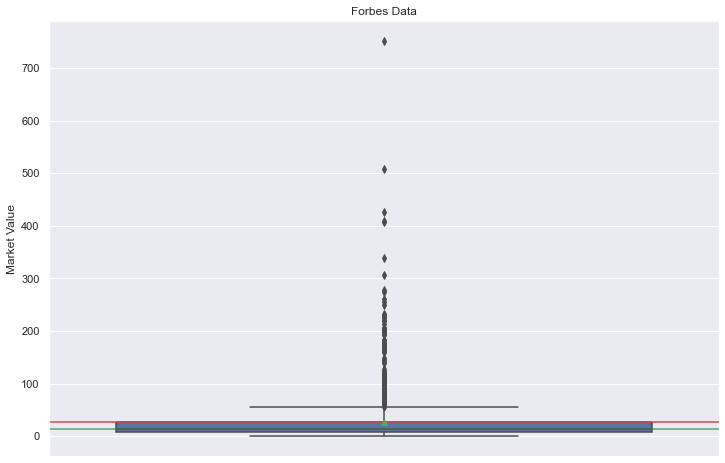

In [51]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=forbes_data, y='Market Value', showmeans=True)

plt.axhline(y=market_value_mean, color='r', linestyle='-')
plt.axhline(y=market_value_med, color='g', linestyle='-')

plt.title('Forbes Data')

plt.show()

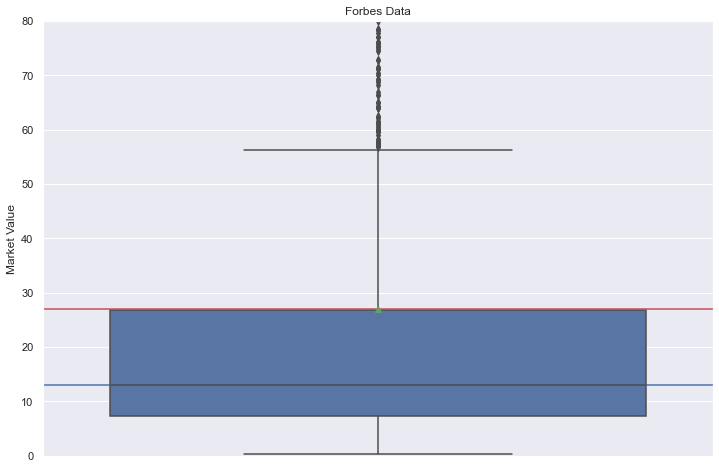

In [52]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=forbes_data, y='Market Value', showmeans=True)

plt.ylim(0, 80)

plt.axhline(y=market_value_mean, color='r', linestyle='-')
plt.axhline(y=market_value_med, color='b', linestyle='-')

plt.title('Forbes Data')
plt.show()

#### Mode 

In [53]:
grouped_data = forbes_data.groupby('Sector', as_index=False).count()

grouped_data.head()

,Sector,Rank,Company,Country,Sales,Profits,Assets,Market Value,Industry
0,Consumer Discretionary,209,209,209,209,209,209,209,209
1,Consumer Staples,106,106,106,106,106,106,106,106
2,Energy,79,79,79,79,79,79,79,79
3,Financials,474,474,474,474,474,474,474,474
4,Health Care,71,71,71,71,71,71,71,71


In [54]:
grouped_data = grouped_data[['Sector', 'Rank']]

grouped_data = grouped_data.sort_values(by='Rank', ascending=False)

grouped_data

,Sector,Rank
3,Financials,474
0,Consumer Discretionary,209
5,Industrials,192
7,Materials,145
1,Consumer Staples,106
6,Information Technology,103
9,Utilities,86
2,Energy,79
4,Health Care,71
8,Telecommunication Services,43


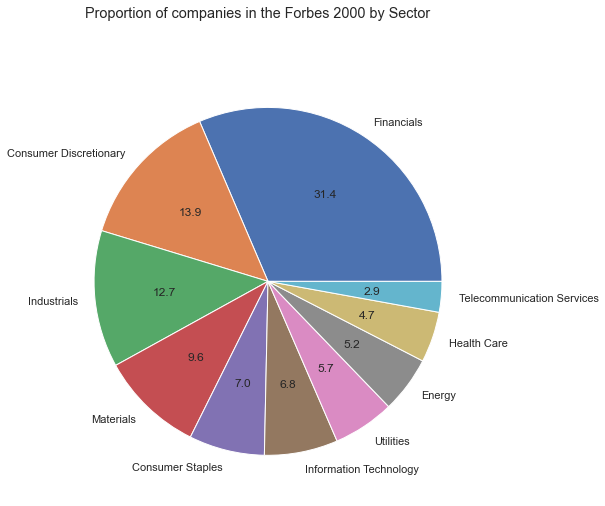

In [55]:
plt.figure(figsize=(12, 8))

plt.pie(grouped_data['Rank'],
        labels=grouped_data['Sector'],
        autopct='%.1f')

plt.suptitle('Proportion of companies in the Forbes 2000 by Sector')

plt.show()

### Dispersions

In [56]:
forbes_data.head()

,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry
0,1,ICBC,China,151.4,42.0,3473.2,229.8,Financials,Major Banks
1,2,China Construction Bank,China,134.2,35.0,3016.6,200.5,Financials,Regional Banks
2,3,Berkshire Hathaway,United States,222.9,24.1,620.9,409.9,Financials,Investment Services
3,4,JPMorgan Chase,United States,102.5,24.2,2513.0,306.6,Financials,Major Banks
4,5,Wells Fargo,United States,97.6,21.9,1943.4,274.4,Financials,Major Banks


#### Range
* For this example we are going to take the 'profits' column

In [57]:
prof_max = forbes_data['Profits'].max()

prof_max

45.2

In [58]:
prof_min = forbes_data['Profits'].min()

prof_min

-13.0

In [59]:
prof_range = prof_max - prof_min

prof_range

58.2

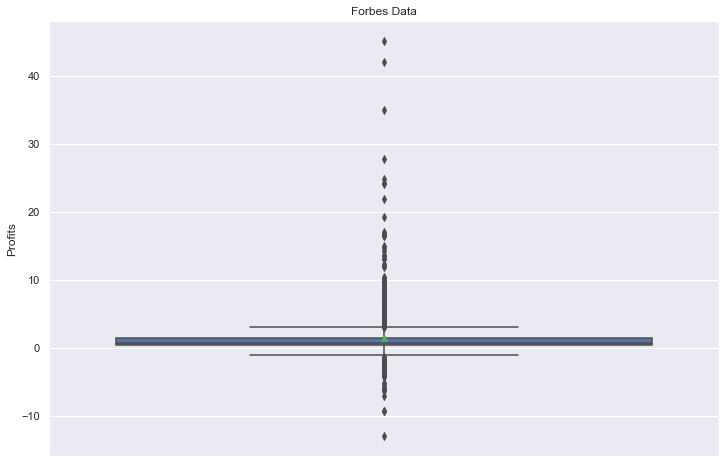

In [60]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=forbes_data, y='Profits', showmeans=True)

plt.title('Forbes Data')

plt.show()

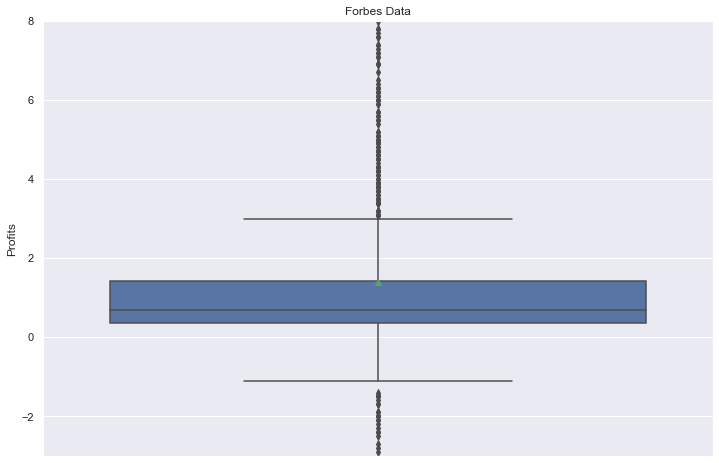

In [61]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=forbes_data, y='Profits', showmeans=True)

plt.title('Forbes Data')
plt.ylim(-3, 8)

plt.show()

#### InterQuartileRange

In [62]:
Q1 = np.quantile(forbes_data['Profits'], 0.25)

Q1

0.34974999999999995

In [63]:
Q3 = np.quantile(forbes_data['Profits'], 0.75)

Q3

1.4249999999999998

In [64]:
IQR = Q3 - Q1

IQR

1.0752499999999998

#### Standard Deviation and Variance

In [65]:
prof_std = forbes_data['Profits'].std()

prof_std

3.244201278603241

In [66]:
prof_var = prof_std **2

prof_var

10.524841936090903

In [67]:
prof_var = forbes_data['Profits'].var()

prof_var

10.524841936090901

#### Summary statistics

In [68]:
forbes_data.describe()

,Rank,Sales,Profits,Assets,Market Value
count,1508.000000,1508.000000,1508.000000,1508.000000,1508.000000
mean,909.135279,19.623046,1.407430,97.647016,26.978494
std,554.044456,30.875809,3.244201,287.036157,47.099541
min,1.000000,0.001000,-13.000000,1.300000,0.240000
25%,433.750000,4.900000,0.349750,12.800000,7.300000
50%,883.500000,10.300000,0.692500,25.900000,13.100000
75%,1354.250000,19.900000,1.425000,60.325000,26.900000
max,1999.000000,485.300000,45.200000,3473.200000,752.000000
